In [19]:
import numpy as np
from matplotlib import pyplot as plt

# Раздел функций

In [42]:
def generator(a = 1,b = 2,scale=0.5):
  t = np.linspace(0, 360, 360)
  x = np.random.normal(a * np.cos(np.radians(t)), scale)
  y = np.random.normal(b * np.sin(np.radians(t)), scale)
  return np.array((x, y))  # (2,360)

In [31]:
def ransac(data, iter=1000, eps=0.5, inlinear_min=10):
  best_params = []
  best_inlinears = []
  for i in range(iter):
    indexes = np.random.choice(data.shape[1], 5, replace=False)
    points = data[:, indexes]
    SLAU = np.array((points[0] ** 2, 2 * points[1] * points[0], points[1] ** 2, points[0], points[1]))
    try:
      coefs = np.append(np.linalg.solve(SLAU.T, -np.ones_like(points[0])),1)
    except np.linalg.LinAlgError: continue

    det = np.linalg.det([[coefs[0], coefs[1], coefs[3]], [coefs[1], coefs[2], coefs[4]], [coefs[3], coefs[4], coefs[5]]])
    if (coefs[0] * coefs[2] - coefs[1] ** 2 > 0) and ((coefs[0] + coefs[2]) * det < 0) == 0: continue  
    Y = coefs[0]*(data[0])**2 + coefs[1]*(data[0])*(data[1])*2 + coefs[2]*(data[1])**2 + coefs[3]*(data[0])*2 + coefs[4]*(data[1])*2 + coefs[5]
    inlinears = np.nonzero(np.abs(Y)<eps)[0]
    if inlinears.shape[0] < inlinear_min: continue
    if inlinears.shape[0] < len(best_inlinears): continue
    best_params = coefs
    best_inlinears = inlinears
  return best_params, best_inlinears

## Основное тело программы

coefs:
[-0.22620779 -0.00654009 -0.05227508  0.03035936 -0.00712647  1.        ]
inliers: (268,)


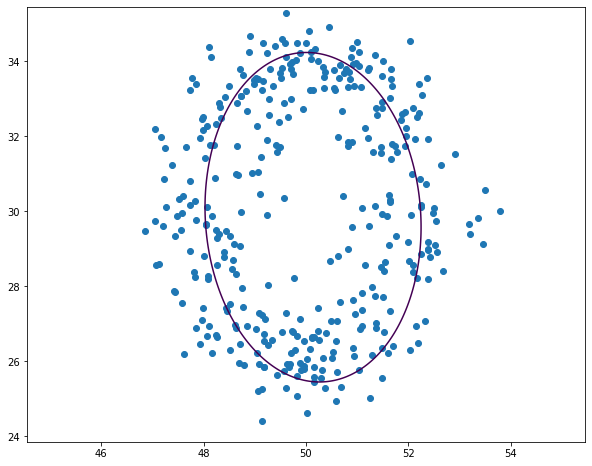

In [44]:
a = 2
b = 4
x0 = 50
y0 = 30
samples=100

y = np.linspace(y0-(a+b)/1.1, y0+(a+b)/1.1, 1000)
x = np.linspace(x0-(a+b)/1.1, x0+(a+b)/1.1, 1000)
x,y = np.meshgrid(x,y)

data = generator(a,b,0.7)
coefs, inliers = ransac(data)
data[0] += x0
data[1] += y0
Y = coefs[0]*(x-x0)**2 + coefs[1]*(x-x0)*(y-y0)*2 + coefs[2]*(y-y0)**2 + coefs[3]*(x-x0)*2 + coefs[4]*(y-y0)*2 + coefs[5]

print(f"coefs:\n{coefs}")
print(f"inliers: {inliers.shape}")
plt.figure(figsize=(10,8))
plt.scatter(data[0], data[1])
plt.contour(x,y,Y,[0]);